In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra, Polynomials
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Caos en el Duffing

volvemos al oscilador de Duffing forzado y buscamos una región en el espacio de parámetros donde tengamos comportamiento aperiódico:

In [2]:
function duffing_forced!(du,u,p,t)
    (μ,β,A,ω)=p
    du[1] = u[2]
    du[2] = -μ*u[2]+u[1]*(β-u[1]*u[1])+A*cos(u[3])
    du[3] = ω
    du
end    

duffing_forced! (generic function with 1 method)

In [3]:
@manipulate throttle=0.5 for μ=0.0:0.01:2.0, β=-2.0:0.01:2.0,A=0:0.01:1, ω=0:0.01:1, x0=-2.0:0.01:2.0,ncycles=4:200
    flux2d_forced(duffing_forced!,[x0,0.0,0.0],[μ,β,A,ω],2*pi/ω;tcycles=0,ncycles=ncycles,xlims=(-2,2),ylims=(-1.5,1.5))
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082e079e0, Task (runnable) @0x0000000082e079e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

Para ciertos valores de parametros (probar por ejemplo μ = 0.05, β = 1.0, A = 0.44, ω = 0.21) el oscilador de Duffing forzado presenta orbitas aperiodicas, esto es que no se cierran nunca y van llenando el espacio de fases de forma densa en una region. Si además cortamos esa región con una sección de Poincaré y el resutado es una estructura filamentosa y no una curva es muy posible que estemos frente a un régimen caótico. 

Es ademas muy dificil (por no decir imposible en la practica) predecir la evolucion de la trayectoria y anticipar en cual de los lobulos (x positivo o x negativo) va a estar la trayectoria luego de un cierto tiempo. El sistema tiene una de las caracteristicas que define a los **sistemas caoticos**. Una perturbacion infinitesimal en las condiciones iniciales conduce a dos trayectorias que se apartan entre si exponencialmente, algo que se conocio durante el boom de la Teoria del Caos en los '80 como "efecto Mariposa"

Las caracteristicas que definen un sistema caotico de forma mas rigurosa son

- Mixing topologico: cualquier region del espacio de fases por pequeña que sea se va a superponer con la evolucion temporal de cualquier otra region si se espera el tiempo suficiente
- Sensibilidad a las condiciones iniciales (efecto Mariposa), dos condiciones inciales muy proximas se alejan entre si durante un tiempo con una tasa de crecimiento exponencial. 
- Otra caracteristica que hace mas rigurosa la definicion es la existencia de infinitas orbitas periodicas inestables.

Nos va a interesar caracterizar solo la ultima propiedad, usamos la funcion butterfly para pasar una condicion incial xini y una perturbacion eps de $10^{-12}$ y en el grafico de la derecha vemos como se alejan entre si en escala logaritmica. A la pendiente positiva se la conoce como **exponente de Lyapunov**. Se puede probar otro sistema que converja a un atractor y mostrar que se ve una pendiente negativa. Un exponente de Lyapunov positivo se considera indicio de Caos.

In [3]:
butterfly(duffing_forced!,[1.0;-0.7;0.0],[0.14,1.0,0.28,1.0],120.0;delta=1e-12,dim=2)

# Caos Bouncing Ball en un circulo

Este es uno de los sistemas fisicos mas simples que presenta caos sin un forzado periodico. Se trata de una bola con gravedad en una cavidad circular. A diferencia del bouncing ball original que ocurria en una dimension este sistema fisico es bidimensional, por lo tanto necesitamos cuatro variables para describirlo: la posicion $x$, $y$ y las componentes de la velocidad $v_x$, $v_y$. Las ecuaciones son las mismas del bouncing ball original en la coordenada $y$ y de hecho el sistema parece excesivamente simple:

$\dot{x} = v_x$ 

$\dot{y} = v_y$ 

$\dot{v_x} = 0$ 

$\dot{v_y} = -g$

donde como antes suponemos que la masa es $1$. Lo complejo aca son las condiciones de borde, vamos a considerar una colision "hard", que si suponemos el origen de coordenadas en el centro de la cavidad y el radio de la misma igual a $1$ va a ser cuando se cumpla la condicion:

$x^2+y^2=1$

En ese caso suponemos una colision perfectamente elastica primero y el efecto de la reflexion es invertir la componente normal de la velocidad y conservar la tangencial, es decir si descomponemos el vector velocidad en una componente normal $v_n$ y otra tangencial $v_t$ el vector velocidad reflejado $v_r$ va a ser simplemente

$\vec{v_r} = \vec{v_{t}} - \vec{v_{n}}$

Estas componentes se pueden obtener haciendo el producto escalar con el vector radio unidad al sitio de la colision $(x,y)$
y al vector unidad tangente estos vectores son (en el punto de la colision).

$\hat{n} = (x,y)$

$\hat{t} = (-y,x)$

Entonces el vector resultante escrito en notacion vectorial queda:

$\vec{v_r} = (\vec{v}.\hat{t})\hat{t}-(\vec{v}.\hat{n})\hat{n}$

Escrito en las componentes cartesianas es un poco mas extenso pero no dificil de computar

$v_x \rightarrow v_x(y^2-x^2)-2xyv_y$

$v_y \rightarrow v_y(x^2-y^2)-2xyv_x$

Escribimos las ecuaciones del sistema, la condicion para la colision y la funcion bounce! para cambiar de direccion la velocidad.

In [5]:
function ballcirclehard!(du,u,p,t)
  du[1] = u[3]
  du[2] = u[4]
  du[3] = 0  
  du[4] = -p[1]
  du  
end

ballcirclehard! (generic function with 1 method)

In [6]:
function collision(u,t,integrator)
  1.0-sqrt(u[1]*u[1]+u[2]*u[2])
end

function collision2(u,t,integrator)
  sqrt(u[1]*u[1]+u[2]*u[2])-1.0
end


function bounce!(integrator)
  (x,y,vx,vy) = integrator.u
  integrator.u[3] = vx*(y*y-x*x)-2*x*y*vy
  integrator.u[4] = vy*(x*x-y*y)-2*x*y*vx
end

bounce! (generic function with 1 method)

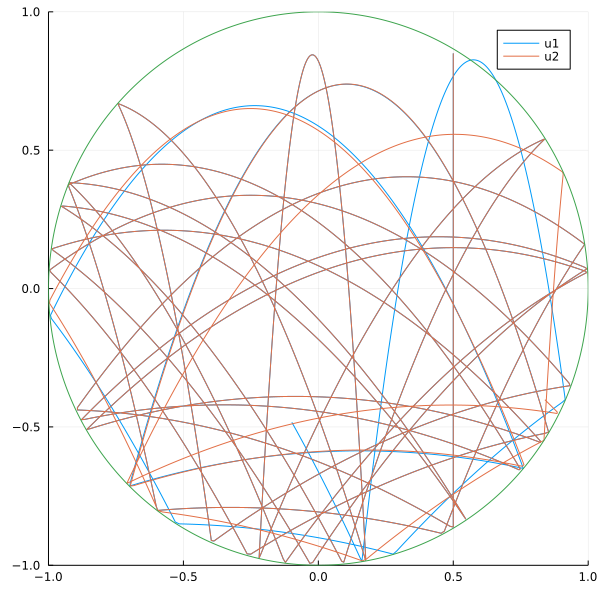

In [7]:
u1 = [0.5,0.85,0.0,0.0]
u2 = [0.5+1e-12,0.85,0.0,0.0]
tspan = (0.0,50.0)
g = 1.0
sol1 = solve(ODEProblem(ballcirclehard!,u1,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
sol2 = solve(ODEProblem(ballcirclehard!,u2,tspan,[g]),callback=ContinuousCallback(collision,bounce!);)
plot(sol1,vars=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u1")
plot!(sol2,vars=(1,2),plotdensity=5000,xlims=(-1,1),ylims=(-1,1),label="u2")
plot!(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),label="",size=(600,600))

Notar que el sistema no tiene puntos fijos porque $\dot{v_y}$ es siempre negativa. El comportamiento errático y la sensibilidad a las condiciones iniciales está dado en este caso por las condiciones de contorno que hacen que la dirección de movimiento cambie amplificando las pequeñas diferencias en las trayectorias. Es decir que no lo podemos analizar con las herramientas que venimos aplicando hasta ahora. Se podría transformar la evolución continua del disco como un flujo 4D a un mapa 3D con el angulo, la velocidad normal y la tangencial como variables, pero es una tarea larga...


In [18]:
# ATENCION Esto es para hacer la animacion de la clase, puede demorar varios minutos! Se puede disminuir el N o aumentar el dt
N = 500; dt = 0.1
anim = @animate for n=1:N
    p1 = plot(cos.(2*pi*(0:0.001:1)),sin.(2*pi*(0:0.001:1)),color=:black,legend=false,size=(660,600))
    plot!(p1,sol1,vars=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:red,alpha=0.2)
    plot!(p1,sol2,vars=(1,2),tspan=(0,n*dt),plotdensity=200*n,xlims=(-1,1),ylims=(-1,1),color=:blue,alpha=0.2)
    scatter!(p1,sol1,vars=(1,2),tspan=(n*dt,n*dt),color=:red,markersize=10,alpha=0.5)
    scatter!(p1,sol2,vars=(1,2),tspan=(n*dt,n*dt),color=:blue,markersize=10,alpha=0.5)
end;

┌ Info: Saved animation to 
│   fn = C:\Users\Camilo\NonLinearDynamicsCourse\Lectures\files\bouncing_chaos_single.gif
└ @ Plots C:\Users\Camilo\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Camilo\\NonLinearDynamicsCourse\\Lectures\\files\\bouncing_chaos_single.gif")
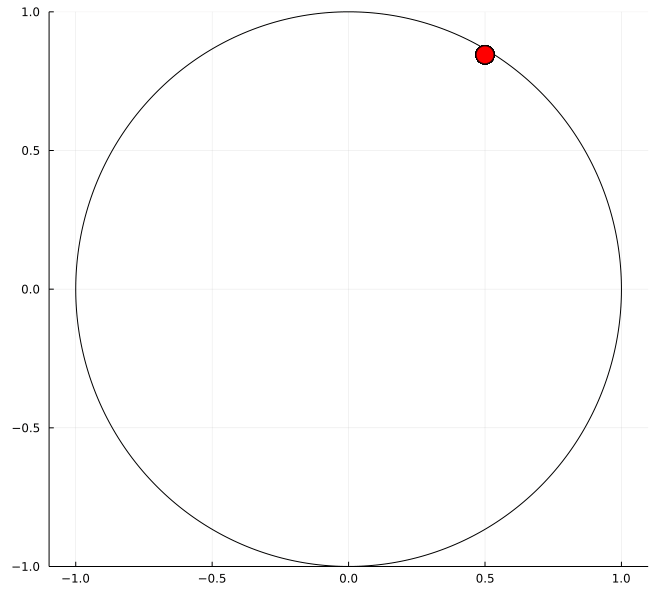

In [10]:
gif(anim, "../files/bouncing_chaos_single.gif", fps = 30)

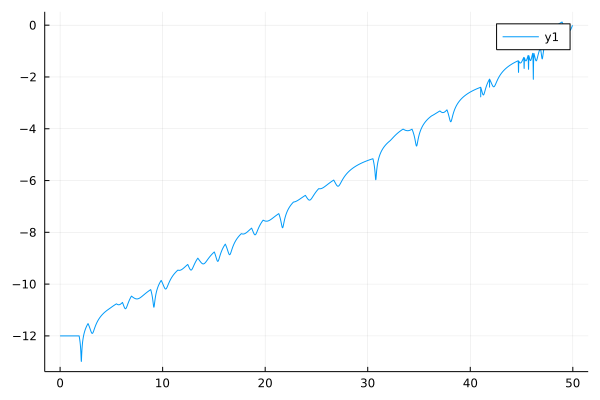

In [8]:
ts = range(0, stop=50, length=50000)
dd = (sol1(ts,idxs=2)-sol2(ts,idxs=2)).^2+(sol1(ts,idxs=1)-sol2(ts,idxs=1)).^2
plot(ts,0.5*log10.(dd))

Lo que si podemos evaluar es la separacion exponencial de las trayectorias que aca abarca 12 ordenes de magnitud.

# El Problema de los Tres Cuerpos (Restringido)

Falta la deducción de esta parte. 
Esta versión del problema de los tres cuerpos es restringida en el sentido siguiente:
- los tres cuerpos tienen trayectorias en el mismo plano
- la masa de uno de ellos es despreciable respecto de los otros dos. Solo se considera la atraccion gravitatoria mutua entre los dos primeros y la accion de los dos primeros cuerpos sobre el tercero pero no a la inversa.

Este problema sirve por ejemplo para estudiar la trayectoria de una nave espacial en el sistema tierra-luna. 
En particular Egorov en la URRSS y Arenstorf (matemático trabajando en la NASA en los '60) estudiaron trayectorias "resonantes" con formas de pétalo que forman islas de estabilidad en el espacio de parámetros. Un review un poco más reciente que tiene como coautor a Buzz Aldrin se puede ver acá:
https://ntrs.nasa.gov/api/citations/20150018049/downloads/20150018049.pdf

El sistema de ecuaciónes para el movimiento de la nave en el sistema de referencia solidario a la rotación de los dos primeros cuerpos es el siguiente:

$\dot{x} = v_x$

$\dot{y} = v_y$

$\dot{v_x} = x + 2 v_y - \mu'(x+\mu)/D_1 - \mu(x-\mu')/D_2 $

$\dot{v_y} = y + 2 v_x - \mu' y/D_1 - \mu y/D_2 $

$D1 = ((x+\mu)^2+y^2)^{3/2}$,       $D2 = ((x-\mu')^2+y^2)^{3/2}$

$\mu' = 1 - \mu $

y con los valores de parametros y condiciones iniciales

$\mu= 0.012277471$, que es el cociente de la masa de la luna con respecto a la tierra

$u_0 = (0.994,0,0,-2.002585106379)$ que corresponde posición y la velocidad inicial de la nave.

In [9]:
function threebody!(du,u,p,t)
    D1 = ((u[1]+p[1])*(u[1]+p[1])+u[2]*u[2])^(3/2)
    D2 = ((u[1]-p[2])*(u[1]-p[2])+u[2]*u[2])^(3/2)
    du[1]=u[3]
    du[2]=u[4]
    du[3]=u[1]+2.0*u[4]-p[2]*(u[1]+p[1])/D1-p[1]*(u[1]-p[2])/D2
    du[4]=u[2]-2.0*u[3]-p[2]*u[2]/D1-p[1]*u[2]/D2
    du
end    
    

threebody! (generic function with 1 method)

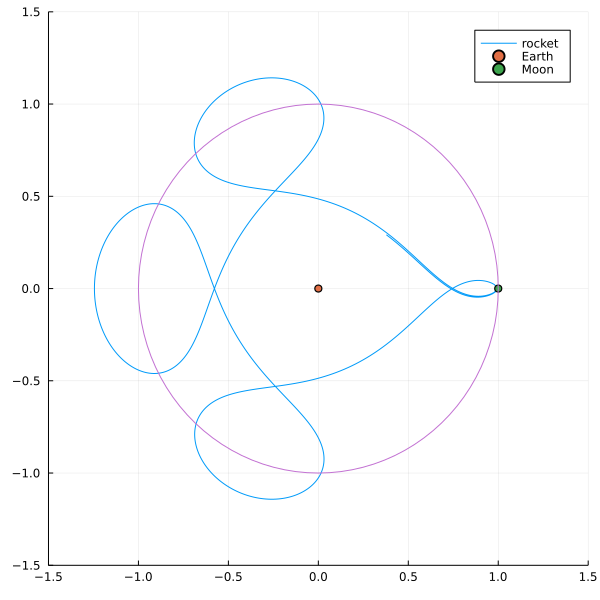

In [10]:
u0 = [0.994,0,0,-2.0015851]
μ = 0.012277471 # Moon
tspan = (0,18.0)
sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
plot(sol,vars=(1,2),label="rocket")
scatter!([0],[0],label="Earth")
scatter!([1],[0],label="Moon")
plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),label="",size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))

In [11]:
@manipulate throttle=.1 for x0=0.993:0.000005:0.996, vy0=-2.1:0.001:-2
    u0 = [x0,0,0,vy0]
    tspan = (0,20.0)
    sol = solve(ODEProblem(threebody!,u0,tspan,[μ,1.0-μ]),Vern9());
    plot(sol,vars=(1,2))
    scatter!([0],[0])
    scatter!([1],[0])
    plot!(cos.(2*pi*(0:0.01:1)),sin.(2*pi*(0:0.01:1)),size=(600,600),xlim=(-1.5,1.5),ylim=(-1.5,1.5))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 601, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
301, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082a09780, Task (runnable) @0x0000000082a09780), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.993\",\"0.993005\",\"0.99301\",\"0.993015\",\"0.99302\",\"0.993025\",\"0.99303\",\"0.993035\",\"0.99304\",\"0.993045\",\"0.99305\",\"0.993055\",\"0.99306\",\"0.993065\",\"0.99307\",\"0.993075\",\"0.99308\"

# Sistema de Lorenz

Este es sin duda el sistema dinámico más famoso que presenta caos. El origen se remonta a un trabajo original realizado por Edward Lorenz en 1963 planteando una reducción a tres ecuaciones diferenciales de un modelo simplificado de convección atmosférica (el modelo original tenía 12 ecuaciones). Para una historia de cómo Lorenz descubrió la sensibilidad a las condiciones iniciales de este sistema a partir de un truncamiento de la simulación numérica impresa en papel y el verdadero origen del término "butterfly effect" puede verse https://www.youtube.com/watch?v=bZ6yxt_o_CQ

$\dot{x} = \sigma(y-x)\\
\dot{y} = \rho x - y - xz\\
\dot{z} = xy - \beta z$





In [35]:
function lorenz!(du,u,p,t)
    (σ,ρ,β)=p
    du[1]=σ*(u[2]-u[1])
    du[2]=ρ*u[1]-u[2]-u[1]*u[3]
    du[3]=u[1]*u[2]-β*u[3]
end    

lorenz! (generic function with 1 method)

In [37]:
σ=10.0; β=8.0/3.0
@manipulate throttle=0.5 for x0=-1.0:0.1:1.0,ρ=0.5:0.1:25.0, tmax=1:1:100
    sol = solve(ODEProblem(lorenz!,[x0,0.1,5.0],(0.0,tmax),[σ,ρ,β]));
    plot(sol,vars=(1,2,3),label="lorenz")
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000c72ca590, Task (runnable) @0x00000000c72ca590), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

60.0[-1.000088900582341e-12, 0.0, 0.0]

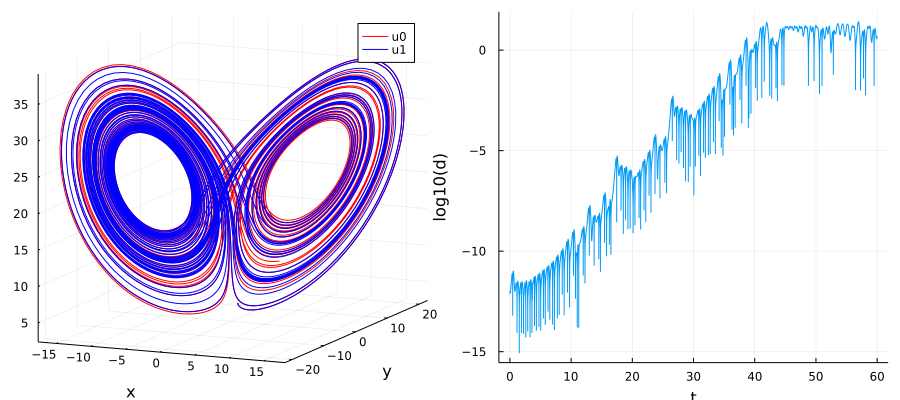

In [38]:
σ=10.0; β=8.0/3.0
butterfly(lorenz!,[1.0;0.1;5.0],[σ,23.7,β],60.0; dim=3)

Podemos entender la sensibilidad a las condiciones iniciales estudiando el siguiente templado que es topológicamente equivalente al atractor

<div>
<img src="../files/lorenz1.jpg" width="500px">
</div>

si hacemos un seccion de Poincare en la linea central y la hacemos corresponder al intervalo $[0,1]$, esto equivale al mapa:

$x \rightarrow 2x \mod 1$

En este mapa todos los numeros racionales corresponden a orbitas periodicas inestables. POr ejemplo:

$1/3 \rightarrow 2/3 \rightarrow 1/3 \quad$ período 2

$1/5 \rightarrow 2/5 \rightarrow 4/5 \rightarrow 3/5 \rightarrow 1/5\quad$ período 4

$1/7 \rightarrow 2/7 \rightarrow 4/7 \rightarrow 1/7\quad$ período 3

$1/15 \rightarrow 2/15 \rightarrow 4/15 \rightarrow 8/15 \rightarrow 1/15$ período 4

Dos condiciones iniciales cualesquiera:$x0$ y  $x0+\delta$ con $\delta$ arbitrariamente pequeño se separan exponencialmente ya que su diferencia se duplica con cada ciclo.

Es decir que tenemos infinitas órbitas periódicas porque hay infinitos racionales y todas esas órbitas periódicas son inestables, lo cual es otro requisito para el caos. 

Por otra parte la sensibilidad a las condiciones iniciales se puede ver de forma directa, si representamos $x0$ en notacion binaria:

In [53]:
bs=bitstring(Float64(pi))
bs[14:end]

"001001000011111101101010100010001000010110100011000"

Mapa decimal 

$x \rightarrow 10x \mod 1$

In [75]:
using Printf
x0 = 0.1234567890123456789
for n=1:12
    @printf "%.16f\n" x0
    x0 = mod(10*x0,1)
end    

0.1234567890123457
0.2345678901234567
0.3456789012345669
0.4567890123456690
0.5678901234566904
0.6789012345669043
0.7890123456690432
0.8901234566904321
0.9012345669043214
0.0123456690432135
0.1234566904321355
0.2345669043213547
